# Forecasting Onset of Diabetes Mellitus

This project focuses on predicting the whether or not a patient has diabetes. The data is cleaned, analyzed, and used to develop a predictive model.

## Columns 

Pregnancies: Number of times pregnant <br><br>
Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test <br><br>
BloodPressure: Diastolic blood pressure (mm Hg) <br> <br>
SkinThickness: Triceps skin fold thickness (mm) <br><br>
Insulin: 2-Hour serum insulin (mu U/ml) <br><br>
BMI: Body mass index (weight in kg/(height in m)^2)<br><br>
Diabetes Pedigree Function: Diabetes pedigree function<br><br>
Age: Age (years)<br><br>
Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0

## Import Tools 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
import itertools 
plt.style.use('fivethirtyeight')

## Load Data

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Data Cleaning <brk>
    
Explore the data to look for any inconsistencies. <br>

Some good procedures when going through data for the first time are:
1. Check number of rows & columns --> df.shape
2. Check for null values 
3. Check data types of each column 
4. Note any imbalances in data, such as one target outcome having significantly more data records than others

In [3]:
df = df.rename(columns = {'BloodPressure':'BP', 'DiabetesPedigreeFunction':"DPF"}) #Rename column titles to make them shorter

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies      768 non-null int64
Glucose          768 non-null int64
BP               768 non-null int64
SkinThickness    768 non-null int64
Insulin          768 non-null int64
BMI              768 non-null float64
DPF              768 non-null float64
Age              768 non-null int64
Outcome          768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DPF,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Notes** <brk>
    
    1. Do the minimum values of 0 make sense for all the different features ??  
    2. There are no null value data points in the original data 
    3. All the data is in the correct data type format (int or float). 
    
    The zero values in certain columns (Glucose, BP, Skin Thickness, Insuline, BMI) will be replaced with 'NaN' until further
    analysis is conducted on the data. 
    
    It is really important to handle these zero values as they affect the statistics of the data. When they are replaced by 
    NaN, Python automatically disregards them when calculating metrics such as mean, median, percentile, etc. 

In [6]:
zeroCols = ['Glucose', 'BP', 'SkinThickness', 'Insulin','BMI'] # Columns with incorrect Zero values 
df2 = df.copy() # create a copy of the original dataframe 
df2[zeroCols] = df2[zeroCols].replace(0,np.NaN) #Replace 0s with NaNs
df2.head()

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [7]:
outcomes = df2["Outcome"].value_counts()
print(outcomes)

0    500
1    268
Name: Outcome, dtype: int64


**Note:** There is an big imbalance between the number of records for both outcomes. This must be taken into consideration when training the model to predict the onset of diabetes. 

**Descriptive Stats Comparison** <br>
Comparison of descriptive stats between the original data and the new data with 0s replaced with NaNs

In [8]:
df.describe() # Original data loaded into a dataframe 

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DPF,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df2.describe() # Data with 0s replaced with NaNs

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DPF,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Note:** After replacing the 0s, 'SkinThickness' and 'Insulin' data has been significantly reduced. Almost 50% of the Insulin values are Null/missing and 30% of SkinThickness values are Null/missing.

In [10]:
#df2.info()

In [11]:
null_values = (df2.isna().sum()/len(df2))*100
null_values.drop(labels = ['Pregnancies','DPF','Age','Outcome'], inplace=True)
print("Column Name" + "     " + "% of Null Values\n")
print(null_values)

Column Name     % of Null Values

Glucose           0.651042
BP                4.557292
SkinThickness    29.557292
Insulin          48.697917
BMI               1.432292
dtype: float64


It is possible that the **presence/lack** of Skin Thickness and Insulin data is related to a person having diabetes. To check, the ratio between the number of data points for each outcome was noted. If the ratio for all the features is within the same range, then it could be assumed that there might not be a relationship as mentioned previously. However, if ratio is significantly skewed one way (ex: records of diabetes patients have significantly more data points of insulin collected), it could be an indicator of a relationship between the missing values and a patient having diabetes. 

In [12]:
dp = df2.groupby('Outcome').count() # Grouping the number of data points for both outcomes 
#print(dp)
outcome_0 = dp.loc[0,:] # Number of data points related to Outcome = 0
outcome_1 = dp.loc[1,:] # Number of data points related to Outcome = 1
print("Column Name" + "     " + "Outcome 1 to Outcome 2 Data Points Ratio\n") 
print(outcome_1/outcome_0)

Column Name     Outcome 1 to Outcome 2 Data Points Ratio

Pregnancies      0.536000
Glucose          0.535211
BP               0.523909
SkinThickness    0.498615
Insulin          0.492424
BMI              0.541752
DPF              0.536000
Age              0.536000
dtype: float64


According to the ratios displayed above, the ratio for the number of data points is around 0.5 (plus-min 0.04). It would be safe to conclude that the ratio between the number of data points for Skin Thickness and Insulin for both outcomes are within the same range as other features. 

## Simple EDA
Explore the data to get a better understanding of different trends, correlations, patterns, etc. 

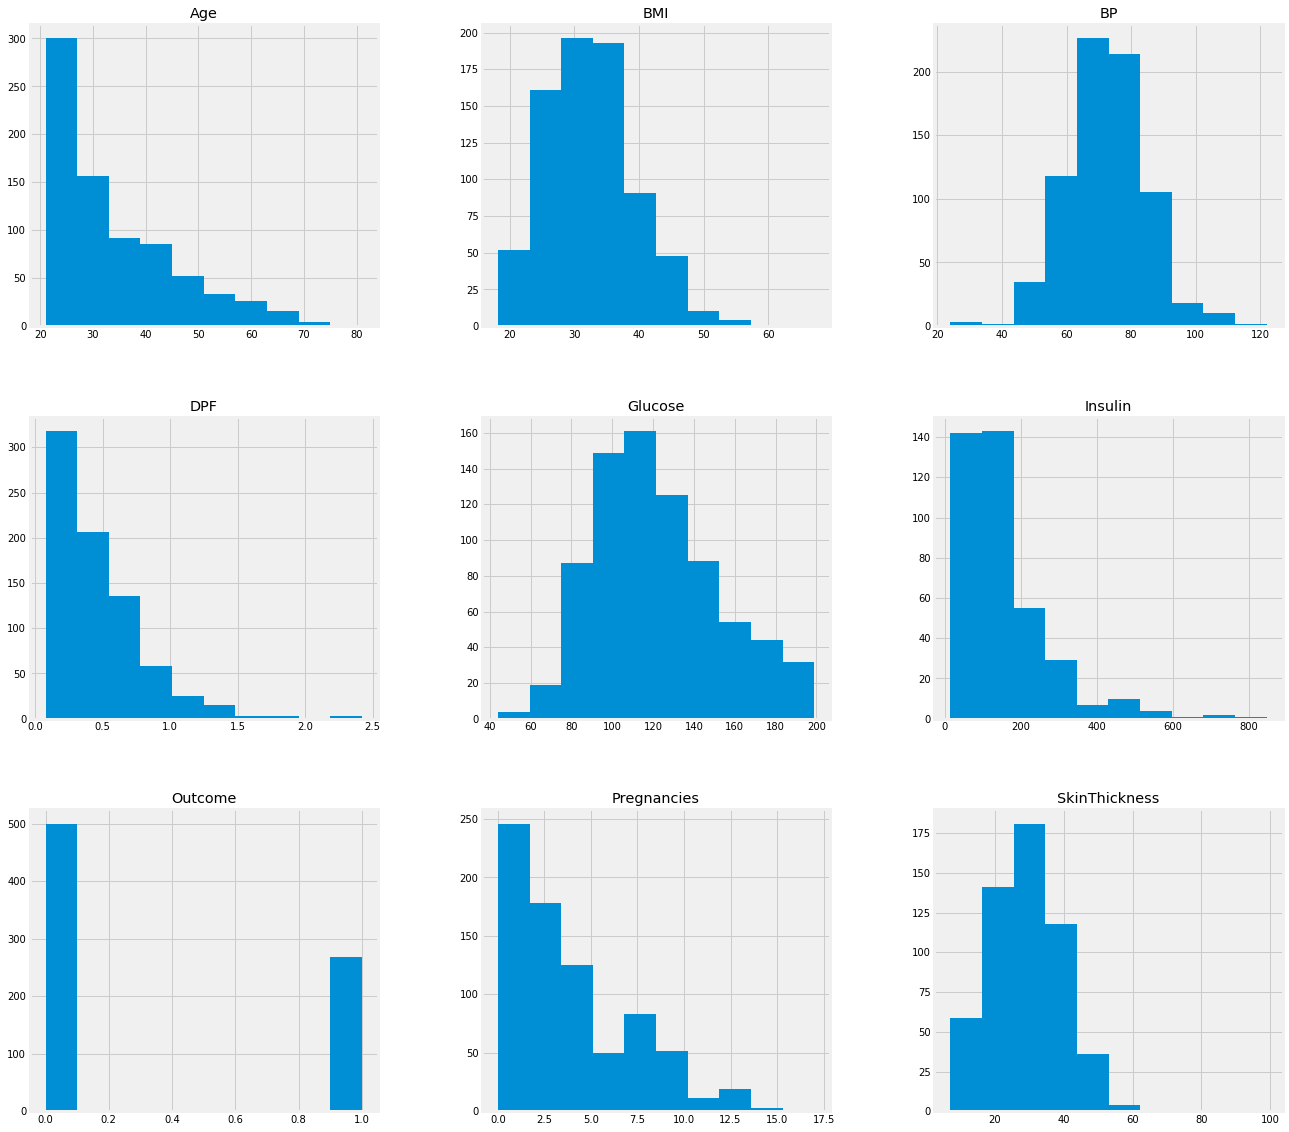

In [13]:
hist = df2.hist(figsize = (20,20))
# Disregard the outcome histogram 

**Based on the skewness of the appropriate features, the 0 values will be replaced. **

In [14]:
# Replace 0 values in BMI, BP (Blood Pressure), Glucose, Insulin, and Skin Thickness 

df2['Glucose'].fillna(df2['Glucose'].median(), inplace = True)
df2['BMI'].fillna(df2['BMI'].median(), inplace = True)
df2['BP'].fillna(df2['BP'].mean(), inplace = True)
df2['Insulin'].fillna(df2['Insulin'].median(), inplace = True)
df2['SkinThickness'].fillna(df2['SkinThickness'].mean(), inplace = True)


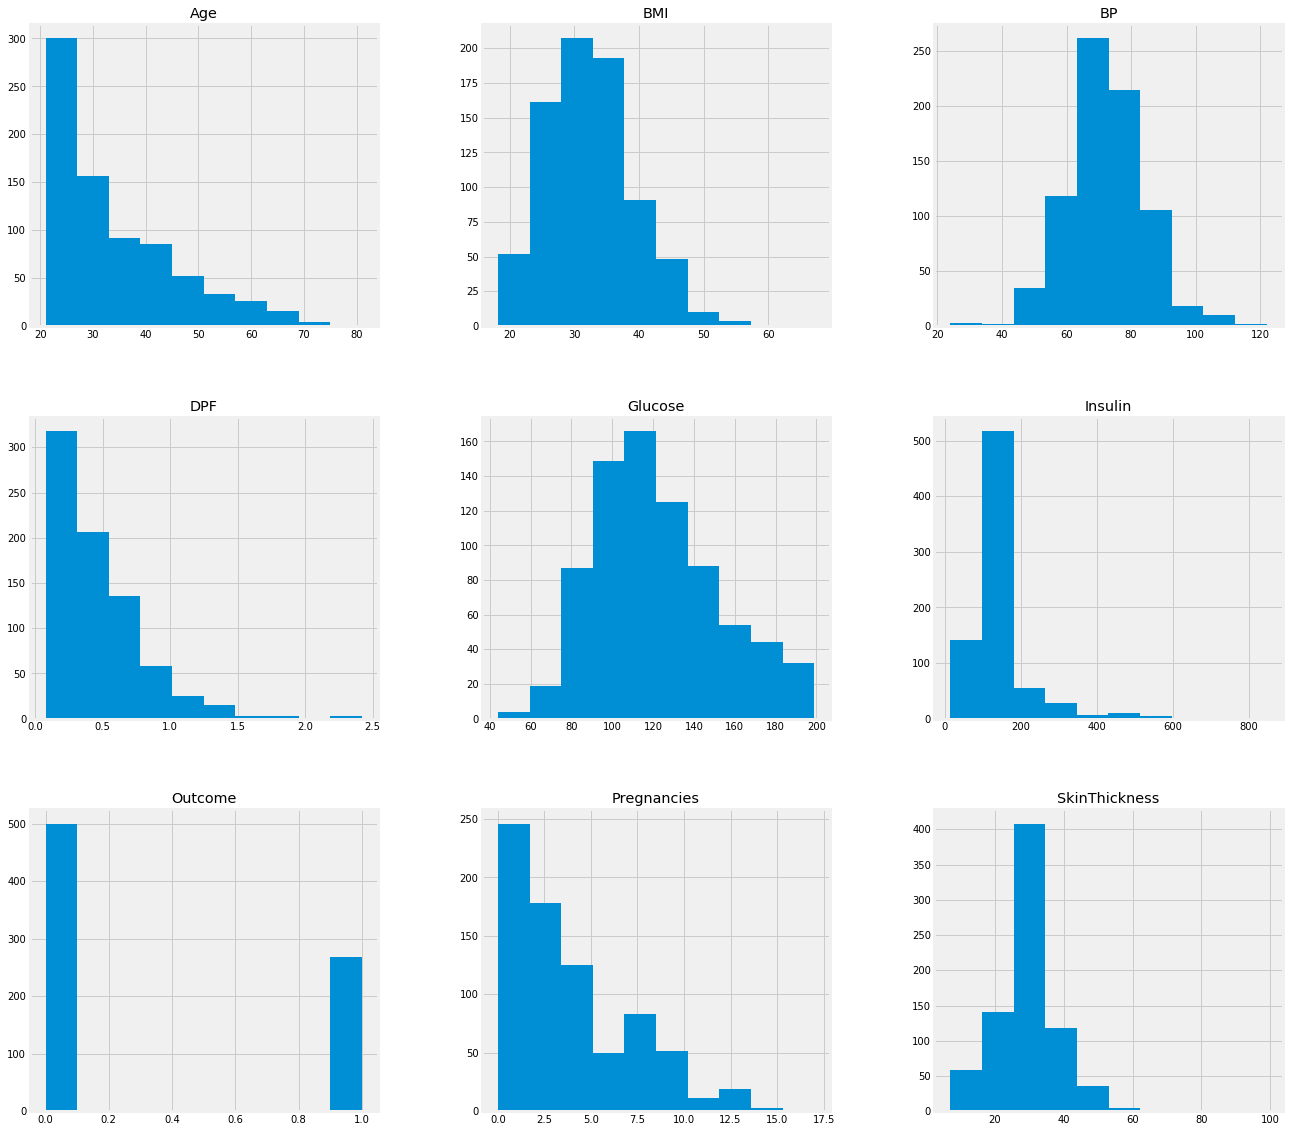

In [110]:
histZR = df2.hist(figsize = (20,20)) # Histogram of data with zeros replaced 

**The zeros have been replaced with mean/median values**  <br>
If the NaN records were removed, half of the records in the dataset would have to be removed as the Insulin data by itself had 48% NaN values. 

## Data Analysis <br>
The data will now be explored more in-depth 

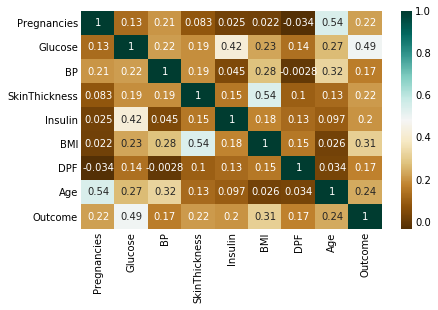

In [16]:
# Heat Map
hmap = sns.heatmap(df2.corr(), cmap = "BrBG", annot=True)

In [17]:
df2.corr()

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DPF,Age,Outcome
Pregnancies,1.000000,0.128213,0.208522,0.082989,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218749,0.192925,0.419451,0.231049,0.137327,0.266909,0.492782
BP,0.208522,0.218749,1.000000,0.192816,0.045087,0.281199,-0.002763,0.324595,0.166074
SkinThickness,0.082989,0.192925,0.192816,1.000000,0.154678,0.542438,0.100966,0.127872,0.215299
Insulin,0.025047,0.419451,0.045087,0.154678,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231049,0.281199,0.542438,0.180241,1.000000,0.153438,0.025597,0.312038
DPF,-0.033523,0.137327,-0.002763,0.100966,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324595,0.127872,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.166074,0.215299,0.203790,0.312038,0.173844,0.238356,1.000000


**Notes:** <br>
1. There is minimal correlation between Skin Thickness & Insulin to the Outcomes. 
2. Relatively, Glucose (0.49) and BMI (0.31) have the highest correlation with the Outcome 

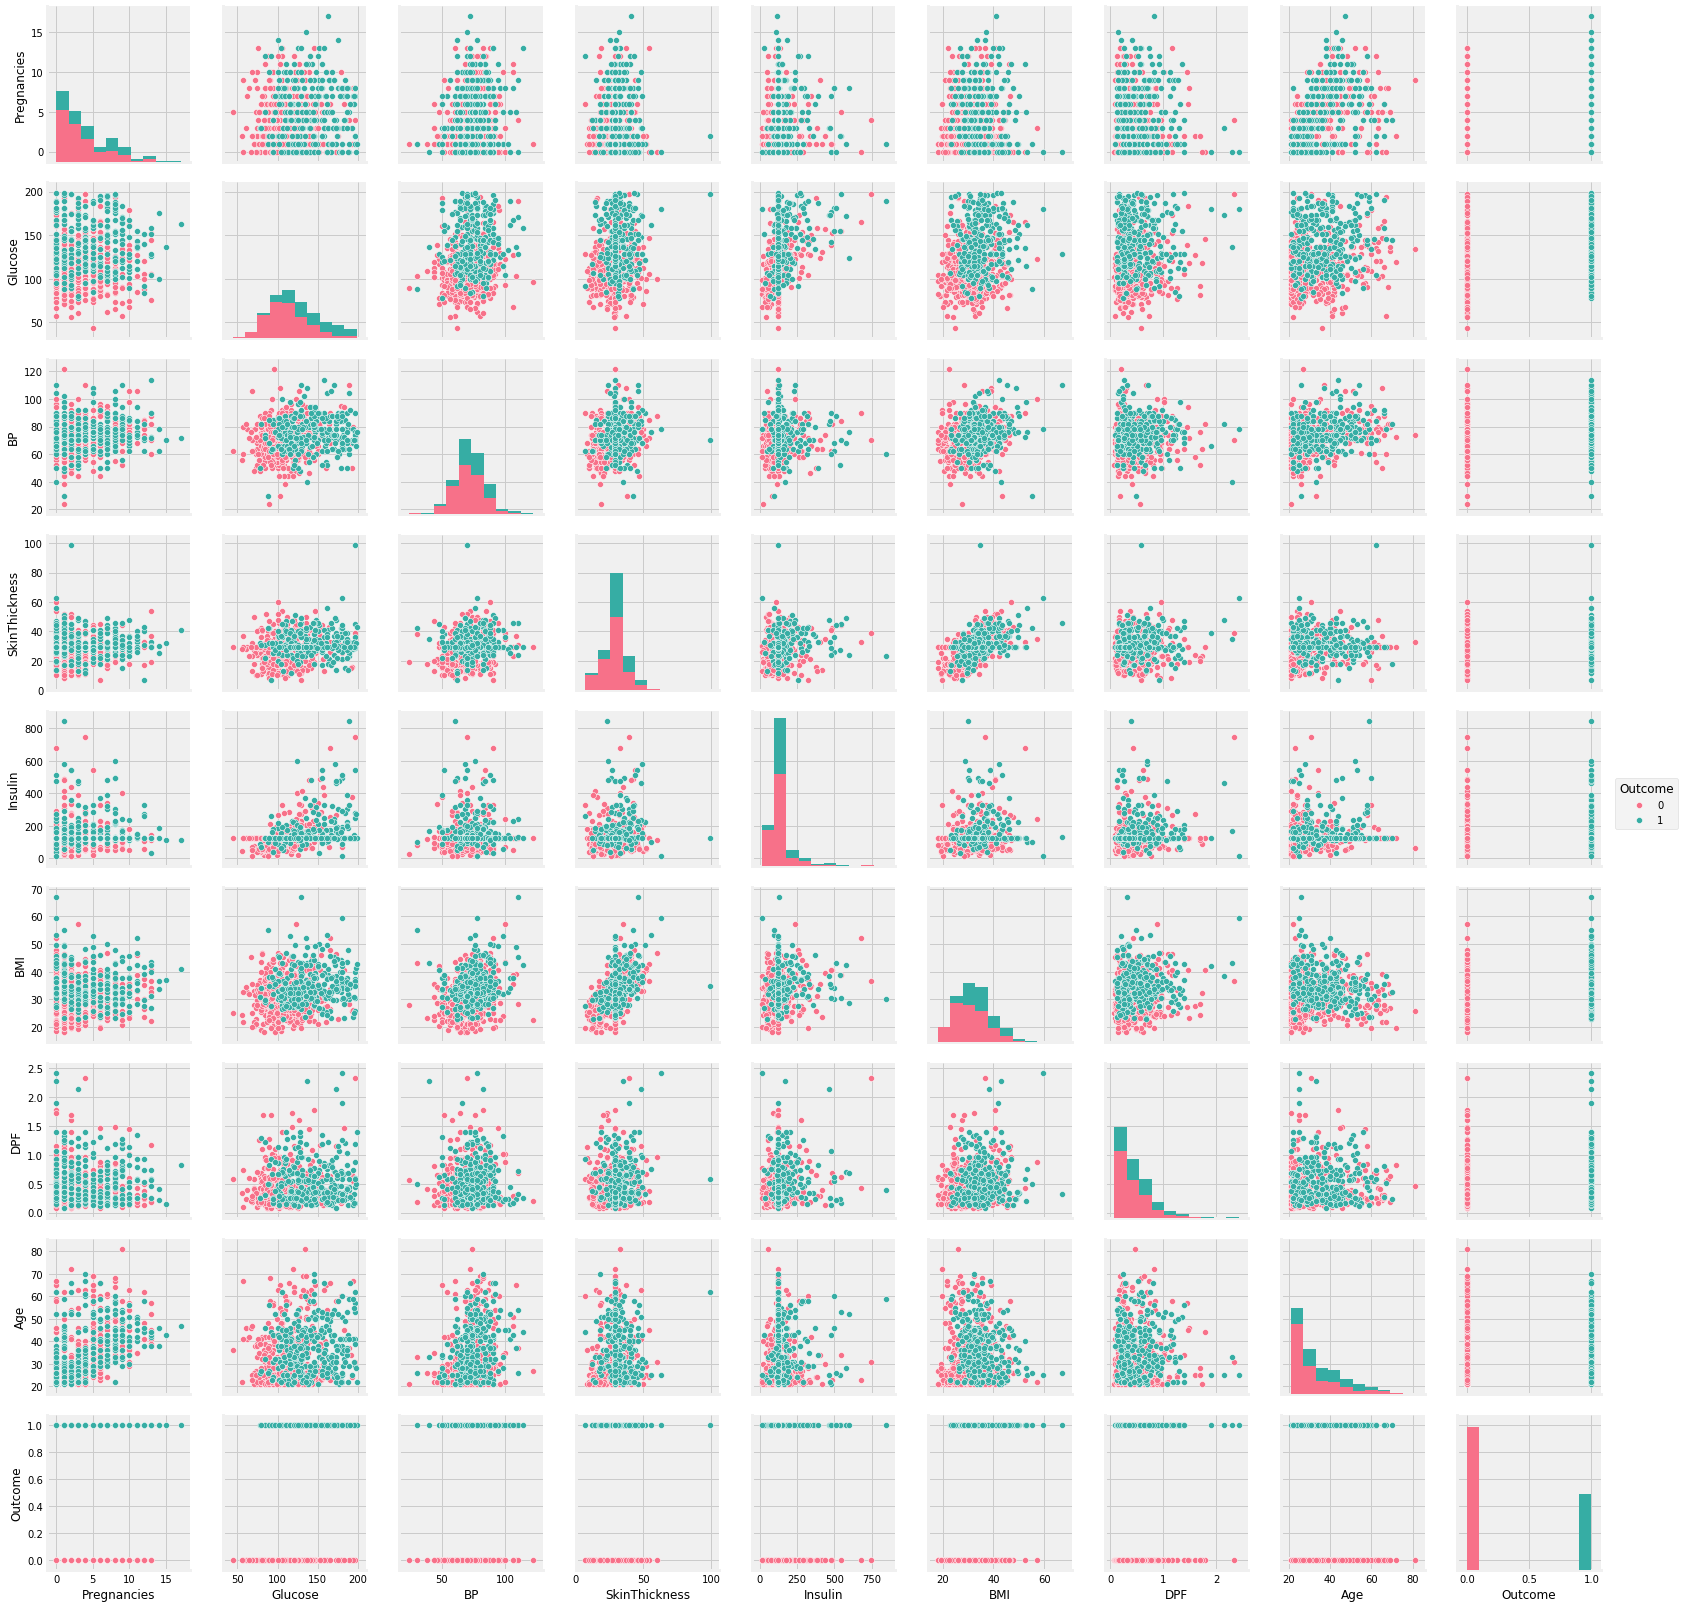

In [18]:
# Pair Plot 
pplot=sns.pairplot(df2, hue = 'Outcome', palette="husl")
plt.show()

**Note:** From the pair plot, it is hard to find any features which clearly distinguish between the outcomes. <br>

**Next:** Lets split the data for both outcomes and compare their descriptive stats. 

In [19]:
out0 = df2[df2['Outcome']==0]
out1 = df2[df2['Outcome']==1]

In [20]:
out0.describe()

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DPF,Age,Outcome
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0
mean,3.298000,110.682000,70.935397,27.768651,127.792000,30.885600,0.429734,31.190000,0.0
std,3.017185,24.707201,11.931033,8.559606,74.447469,6.504128,0.299085,11.667655,0.0
min,0.000000,44.000000,24.000000,7.000000,15.000000,18.200000,0.078000,21.000000,0.0
25%,1.000000,93.000000,63.500000,22.000000,95.000000,25.750000,0.229750,23.000000,0.0
50%,2.000000,107.500000,72.000000,29.153420,125.000000,30.400000,0.336000,27.000000,0.0
75%,5.000000,125.000000,78.000000,31.000000,125.000000,35.300000,0.561750,37.000000,0.0
max,13.000000,197.000000,122.000000,60.000000,744.000000,57.300000,2.329000,81.000000,0.0


In [21]:
out1.describe()

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DPF,Age,Outcome
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.0
mean,4.865672,142.130597,75.147324,31.736944,164.701493,35.383582,0.550500,37.067164,1.0
std,3.741239,29.568839,11.945712,8.647599,100.932249,6.595603,0.372354,10.968254,0.0
min,0.000000,78.000000,30.000000,7.000000,14.000000,22.900000,0.088000,21.000000,1.0
25%,1.750000,119.000000,68.000000,29.153420,125.000000,30.900000,0.262500,28.000000,1.0
50%,4.000000,140.000000,74.000000,29.153420,125.000000,34.250000,0.449000,36.000000,1.0
75%,8.000000,167.000000,82.000000,36.000000,167.250000,38.775000,0.728000,44.000000,1.0
max,17.000000,199.000000,114.000000,99.000000,846.000000,67.100000,2.420000,70.000000,1.0


From a first glance, it seems that the data for Outcome 1 has higher descritive stats values. However, there is also a **high standard deviation** and  the distrbution for all the features are not 'normal'. 

## Data Preparation (Machine Learning)

Data needs to prepared to be used in machine learning models. If there is categorical data, it would need to be encoded. Numerical data would need to be scaled. 

Splitting the data into training and testing sets is also very important.It is never good to train your model on some data, and then test it on that same data. There are different approaches to help improve generalization in a model, but it is always important to test the model on data it has never seen before.

### Approach <br>

**Imbalanced Data** <br>
Approximately 35% of the data has an outcome of 1, and 65% of the data has an outcome of 0. The imbalance is not extreme but learning to address such problems is still important when developming machine learning models. In this approach an ensemble learning method will be used with **SVM, Logistic Regression, Random Forests, and KNN** 


**AUROC** will be used to gage a models' ability to correctly classify the data. The models will also be "penalized" or optimized to handle the imbalanced data as best as possible. For more information, look into ROC curves.

**Train/Validation/Test Split**:The data will be split into three groups. <br>
Training data: data used to train the model <br>
Validation: data used to tune the hyperparameters <br> 
Test: data used for final evaluation of the model <br>
--> Ratio: 70/15/15

### Import Algorithms

In [150]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split

### Feature Scaling 
Some algorithms require the features to be **scaled/standardized/normalized**. There are different ways to accomplish this, but the method may vary based on the spread of the data. We will use Sklearn's **Robust Scaler** which uses the inerquartile range to scale the values.

Required: KNN, Logistic Regression, SVM <br>
Not Required: Random Forests 

**Data Prep** <br>
The data will be split into training/validation/test sets

In [38]:
features = (df2.iloc[:,:8]).values # feature values 
target = (df2.loc[:,'Outcome']).values # target values 

In [47]:
# Train - Validation/Test Split --> 70/30 
testSize = 0.3
trainSize = 0.7
validSize = 0.5
rs = 42 # random state 

x_train, x, y_train, y = train_test_split(features,target,train_size = trainSize, random_state=rs)
x_val, x_test, y_val, y_test = train_test_split(x,y,train_size=validSize, random_state = rs)

C:\Users\Shakti\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [51]:
print(f"# of Training Data:{len(x_train)}\n# of Validation Data: {len(x_val)}\n# of Test Data:{len(x_test)}")

# of Training Data:537
# of Validation Data: 115
# of Test Data:116


**Data Scaling**

In [142]:
scaler = RobustScaler()
xTrain_scaled = scaler.fit_transform(x_train)
xVal_scaled = scaler.fit_transform(x_val)
xTest_scaled= scaler.fit_transform(x_test)

### Machine Learning Models

**Evaluation Metrics**<br>
These metrics give us a better understanding of how our model performs. Ideally, AUC of ROC should be as close to 1 as possible. Sensititivy is a measure of the proportion of actual positives that are classified (e.g.the percentage of sick people who are correctly identified as having the condition). Sensitivity is a measure of actual negatives that are correctly classified (e.g. the percentage of healthy people who are correctly identified as not having the condition). Both of those metrics are used to measure the AUC. <br><br>
Accuracy alone is not a good enough measure. If there were 150 (Class 1) and 10 (Class 2) data points. Even if the model misclassifies all of the Class 2 data points, the accuracy would still be 150/160 (93.75%). In cases which imbalances in data it is vital to use other metrics to measure the performance of the model. 

#### 1. SVM 

In [143]:
# Initialize SVM Classifier 
svm_ = SVC(kernel='linear',class_weight = 'balanced', random_state = 1)

#Train the model with the training data 
svm_.fit(xTrain_scaled,y_train)

#Validate the model 
y_valPredict = svm_.predict(xVal_scaled)

**Evaluate the SVM Model**

In [167]:
# Area Under ROC Curve
auc = roc_auc_score(y_val,y_valPredict)

# Confusion Matrix Evaluation 
cm = confusion_matrix(y_val,y_valPredict)

# True negative, Flase positive, false negative, true positive
tn_svm, fp_svm, fn_svm, tp_svm = confusion_matrix(y_val,y_valPredict).ravel() 

# True Positive Rate (Sensitivity)
tpr_svm = tp_svm/(tp_svm+fn_svm)

# True Negative Rate (Specificity)
tnr_svm = tn_svm/(tn_svm+fp_svm)

# Accuracy 
acc = metrics.accuracy_score(y_val,y_valPredict)


In [169]:
print(f"Sensititivy:{tpr_svm}\n\n, \
      Specificity:{tnr_svm}\n\n, \
      AUC:{auc}\n\n, \
      Accuracy:{acc}"\
     )

Sensititivy:0.6486486486486487

Specificity:0.6794871794871795

AUC:0.6640679140679141

Accuracy:0.6695652173913044
